In [6]:
#import libraries
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True) #offline modela ilgili
import plotly.graph_objs as go


from wordcloud import WordCloud
# matplotlib
import matplotlib.pyplot as plt
#import libraries
import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
# plotly
# import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True) #offline modela ilgili
import plotly.graph_objs as go


from wordcloud import WordCloud
# matplotlib
import matplotlib.pyplot as plt

In [7]:
#read the data
book_tags = pd.read_csv('book_tags.csv',encoding="Latin1")
books = pd.read_csv('books.csv', encoding="Latin1")
ratings = pd.read_csv('ratings.csv',encoding="Latin1")
tags = pd.read_csv('tags.csv', encoding="Latin1")
to_read = pd.read_csv('to_read.csv',encoding="Latin1")

# EDA

In [8]:
books.head(2)

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPrÃ©",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...


In [9]:
books.shape

(10000, 23)

> - Data has tweenty three columns and 10000 rows.

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         10000 non-null  int64  
 1   book_id                    10000 non-null  int64  
 2   best_book_id               10000 non-null  int64  
 3   work_id                    10000 non-null  int64  
 4   books_count                10000 non-null  int64  
 5   isbn                       9300 non-null   object 
 6   isbn13                     9415 non-null   float64
 7   authors                    10000 non-null  object 
 8   original_publication_year  9979 non-null   float64
 9   original_title             9415 non-null   object 
 10  title                      10000 non-null  object 
 11  language_code              8916 non-null   object 
 12  average_rating             10000 non-null  float64
 13  ratings_count              10000 non-null  int6

In [11]:
books.describe()

,id,book_id,best_book_id,work_id,books_count,isbn13,original_publication_year,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
count,10000.00000,1.000000e+04,1.000000e+04,1.000000e+04,10000.000000,9.415000e+03,9979.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,1.000000e+04
mean,5000.50000,5.264697e+06,5.471214e+06,8.646183e+06,75.712700,9.755044e+12,1981.987674,4.002191,5.400124e+04,5.968732e+04,2919.955300,1345.040600,3110.885000,11475.893800,1.996570e+04,2.378981e+04
std,2886.89568,7.575462e+06,7.827330e+06,1.175106e+07,170.470728,4.428619e+11,152.576665,0.254427,1.573700e+05,1.678038e+05,6124.378132,6635.626263,9717.123578,28546.449183,5.144736e+04,7.976889e+04
min,1.00000,1.000000e+00,1.000000e+00,8.700000e+01,1.000000,1.951703e+08,-1750.000000,2.470000,2.716000e+03,5.510000e+03,3.000000,11.000000,30.000000,323.000000,7.500000e+02,7.540000e+02
25%,2500.75000,4.627575e+04,4.791175e+04,1.008841e+06,23.000000,9.780316e+12,1990.000000,3.850000,1.356875e+04,1.543875e+04,694.000000,196.000000,656.000000,3112.000000,5.405750e+03,5.334000e+03
50%,5000.50000,3.949655e+05,4.251235e+05,2.719524e+06,40.000000,9.780452e+12,2004.000000,4.020000,2.115550e+04,2.383250e+04,1402.000000,391.000000,1163.000000,4894.000000,8.269500e+03,8.836000e+03
75%,7500.25000,9.382225e+06,9.636112e+06,1.451775e+07,67.000000,9.780831e+12,2011.000000,4.180000,4.105350e+04,4.591500e+04,2744.250000,885.000000,2353.250000,9287.000000,1.602350e+04,1.730450e+04
max,10000.00000,3.328864e+07,3.553423e+07,5.639960e+07,3455.000000,9.790008e+12,2017.000000,4.820000,4.780653e+06,4.942365e+06,155254.000000,456191.000000,436802.000000,793319.000000,1.481305e+06,3.011543e+06


In [12]:
books['authors'].unique()

array(['Suzanne Collins', 'J.K. Rowling, Mary GrandPrÃ©',
       'Stephenie Meyer', ..., 'Ian Mortimer', 'Peggy Orenstein',
       'John Keegan'], dtype=object)

In [13]:
len(books['authors'].unique())

4664

In [14]:
books['average_rating'].sort_values(ascending=False)

,average_rating
3627,4.82
3274,4.77
861,4.77
8853,4.76
7946,4.76
...,...
9020,2.80
4008,2.80
8006,2.76
3549,2.67


In [15]:
# clean the data
books['authors'].value_counts(dropna=False)

,count
authors,
Stephen King,60
Nora Roberts,59
Dean Koontz,47
Terry Pratchett,42
Agatha Christie,39
...,...
Ildefonso Falcones,1
"Jon Stewart, Rory Albanese, Kevin Bleyer, Rich Bloomquist, Steve Bodow, Tim Carvell, Wyatt Cenac, Hallie Haglund, J.R. Havlan, David Javerbaum, Elliott Kalan, Josh Lieb, Sam Means, Jo Miller, John Oliver, Daniel Radosh, Jason Ross",1
G. Norman Lippert,1


In [16]:
import warnings
warnings.filterwarnings("ignore")

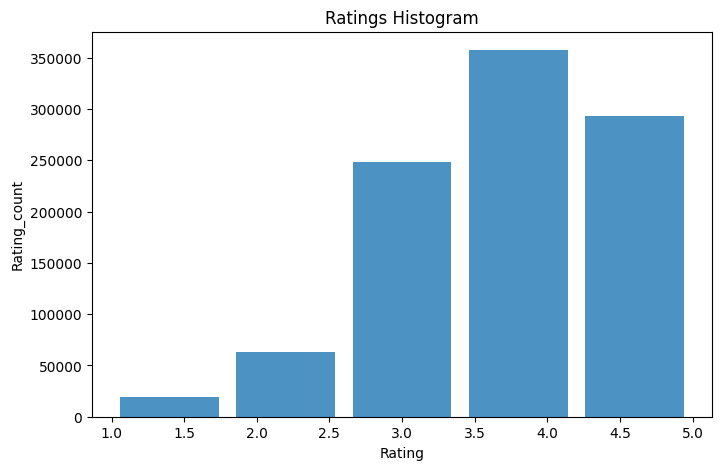

In [17]:
plt.figure(figsize=(8,5))
# An "interface" to matplotlib.axes.Axes.hist() method
n, bins, patches = plt.hist(x=ratings['rating'],bins=5,alpha=0.8,rwidth=0.85)
plt.xlabel('Rating')
plt.ylabel('Rating_count')
plt.title('Ratings Histogram')
plt.show()

In [18]:
#change some features' name.
data1= books.head(20)
data1.rename(columns={'ratings_1':'R1', 'ratings_2':'R2','ratings_3':'R3','ratings_4':'R4','ratings_5':'R5'}, inplace=True)

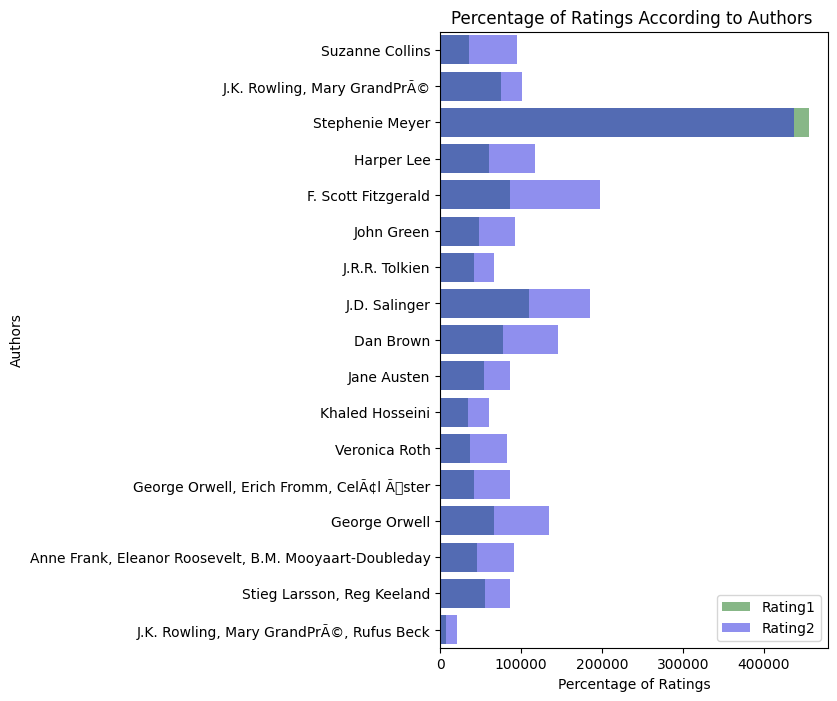

In [19]:
# Percentage of Ratings According to Authors
author_list= list(data1['authors'].unique())

ratings1= []
ratings2= []
for i in author_list:

    x = data1[data1['authors']==i]
    ratings1.append(sum(x.R1)/len(x))
    ratings2.append(sum(x.R2)/len(x))

f,ax = plt.subplots(figsize = (5,8))
sns.barplot(x=ratings1,y=author_list,color='green',alpha = 0.5,label='Rating1' )
sns.barplot(x=ratings2,y=author_list,color='blue',alpha = 0.5,label='Rating2' )
ax.legend(loc='lower right',frameon = True)
ax.set(xlabel='Percentage of Ratings', ylabel='Authors',title = "Percentage of Ratings According to Authors ")
plt.show()


In [20]:
# prepare data frames
df2004 = books[books.original_publication_year == 2004].iloc[:200,:]
df2005 = books[books.original_publication_year == 2005].iloc[:200,:]
df2003 = books[books.original_publication_year == 2003].iloc[:200,:]

import plotly.graph_objs as go
trace1 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R1,
                    mode = "markers",
                    name = "2004",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2004.authors)
trace2 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R2,
                    mode = "markers",
                    name = "2005",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2005.authors)
trace3 =go.Scatter(
                    x = data1.average_rating,
                    y = data1.R3,
                    mode = "markers",
                    name = "2003",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2003.authors)
data = [trace1, trace2, trace3]
layout = dict(
              xaxis= dict(title= 'Average Ratings',ticklen= 9,zeroline= False),
              yaxis= dict(title= 'Ratings',ticklen= 9,zeroline= False),
              title = "Ratings and Average Ratings of 2004/2005/2006"
             )
fig = dict(data = data, layout = layout)
iplot(fig)

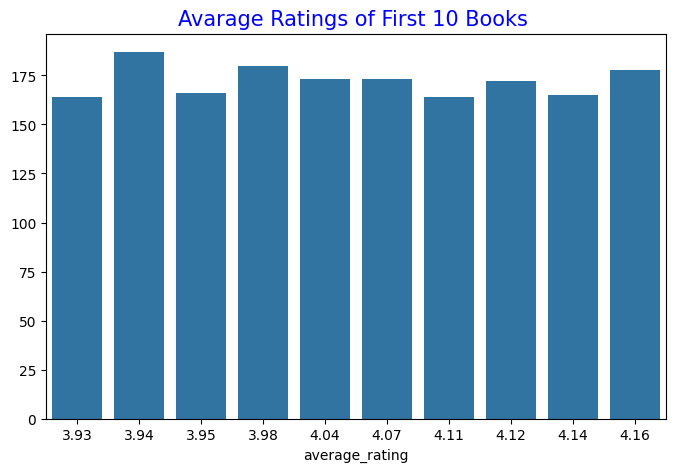

In [21]:
data3=books.head(6)
sta = books.average_rating.value_counts().index[:10]
plt.figure(figsize = (8,5))
sns.barplot(x=sta,y =books.average_rating.value_counts().values[:10])
plt.title('Avarage Ratings of First 10 Books ',color = 'blue',fontsize=15)
plt.show()

In [22]:
df = books[books.original_publication_year == 2014].iloc[:10,:]

import plotly.graph_objs as go

x = df.authors
trace1 = {
  'x': x,
  'y': df.ratings_1,
  'name': 'ratings_1',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df.ratings_2,
  'name': 'ratings_2',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 Authors'},
  'barmode': 'relative',
  'title': 'Ratings1 and Ratings2 of Top 10 Authors in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [23]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

df = books[books.original_publication_year == 2009].iloc[:7,:]
pie1 = df.ratings_1
df1 = books[books.original_publication_year == 2010].iloc[:7,:]
pie2 = df1.ratings_1
labels = df.authors.value_counts().index

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Number Of Authors Rates"),
              1, 1)
fig.add_trace(go.Pie(labels=labels, values=pie1, name="Number Of Authors Rates"),
              1, 2)
# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.45, hoverinfo="label+percent+name")
fig.update_layout(
    height=800, width=800,
    title_text="Number of Authors Ratings Rates",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='2009', x=0.175, y=0.5, font_size=14, showarrow=False),
                 dict(text='2010', x=0.82, y=0.5, font_size=14, showarrow=False)])
fig.show()

In [24]:
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
df1 = books[books.original_publication_year == 2009]
trace0 = go.Scatter(
    y=df1.ratings_1,
    name = 'Rating1',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Scatter(
    y=df1.ratings_2,
    name = 'Rating2',
     xaxis='x2',
     yaxis='y2',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Ratings1 and Ratings2 of 2009'
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [25]:
books2= books.drop(columns=['work_id','id','book_id','best_book_id','best_book_id','isbn13','original_publication_year',"image_url","small_image_url"])

In [30]:
books2_numeric = books2.select_dtypes(include=np.number)  # Select only numeric columns
correlation_matrix = books2_numeric.corr()
print(correlation_matrix)

                         books_count  average_rating  ratings_count  \
books_count                 1.000000       -0.069888       0.324235   
average_rating             -0.069888        1.000000       0.044990   
ratings_count               0.324235        0.044990       1.000000   
work_ratings_count          0.333664        0.045042       0.995068   
work_text_reviews_count     0.198698        0.007481       0.779635   
ratings_1                   0.225763       -0.077997       0.723144   
ratings_2                   0.334923       -0.115875       0.845949   
ratings_3                   0.383699       -0.065237       0.935193   
ratings_4                   0.349564        0.036108       0.978869   
ratings_5                   0.279559        0.115412       0.964046   

                         work_ratings_count  work_text_reviews_count  \
books_count                        0.333664                 0.198698   
average_rating                     0.045042                 0.007481   
ra

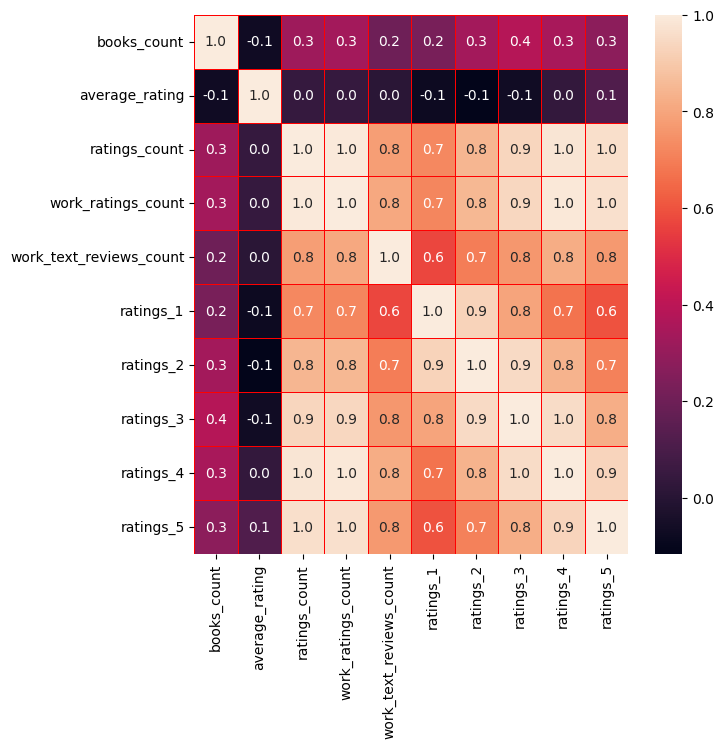

In [31]:
f,ax = plt.subplots(figsize=(7,7))
# Select only numeric features for correlation
numeric_books2 = books2.select_dtypes(include=np.number)
sns.heatmap(numeric_books2.corr(), annot=True, linewidths=0.6,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

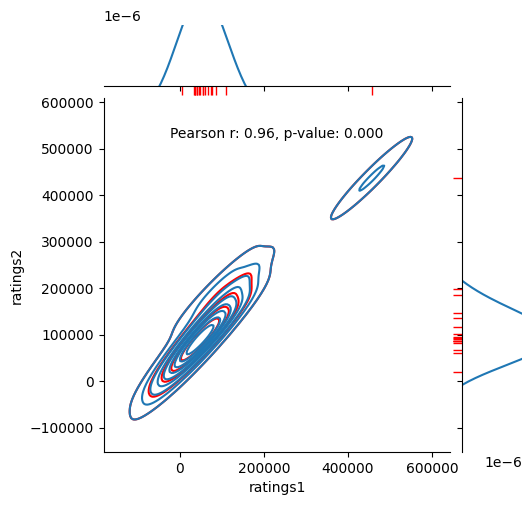

In [34]:
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

data_new = pd.DataFrame({'ratings1': ratings1, 'ratings2': ratings2})
# Pass data as a DataFrame and specify x and y columns
g = sns.jointplot(x='ratings1', y='ratings2', data=data_new, kind="kde", height=5)
g.plot_joint(sns.kdeplot, color="r", zorder=0, levels=6)
g.plot_marginals(sns.rugplot, color="r", height=-.15, clip_on=False)

# Calculate Pearson correlation coefficient and p-value
pearson_r, p_value = stats.pearsonr(data_new['ratings1'], data_new['ratings2'])

# Annotate the plot with the correlation coefficient and p-value
g.ax_joint.text(0.5, 0.9, f'Pearson r: {pearson_r:.2f}, p-value: {p_value:.3f}',
                transform=g.ax_joint.transAxes, ha='center', va='center')

plt.show()

- **Correlation coefficient** is a statistical method used to determine the direction and severity of relationship between two numerical measurements which have a linear relationship.

-If the data is normally distributed,** Pearson correlation coefficient** is preferred but if it is not, **Spearman rank correlation coefficient ** is preferred.
-In order to interpret a correlation coefficient, p value should be less than 0.05.

- **Pearson correlation coefficient (r)**
- r <0.2 very weak relationship or no correlation
- 0.2<r<0.4 poor correlation between
- 0.4<r<0.6 moderate correlation between
- 0.6<r<0.8 high correlation between
- r>0.8 is interpreted to be very high correlation.

-If the correlation coefficient is negative,there is an inverse proportion between the two variables,that means when the value of one variable increases, the other decreases. If the correlation coefficient is positive, when the value of one variable increases, the other increases as well.

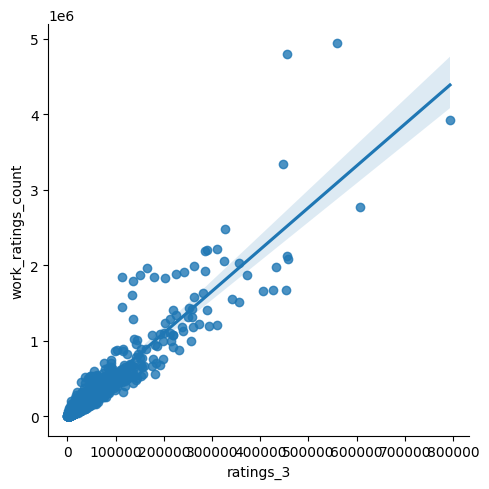

In [35]:
sns.lmplot(x="ratings_3", y="work_ratings_count", data=books2)
plt.show()

# **Building Book Recommendation System**

> Using pyspark

In [36]:
pip install pyspark

In [37]:
import pyspark as ps
from pyspark.sql import SQLContext,Row
from pyspark.ml.evaluation import  RegressionEvaluator
from pyspark.ml.tuning import CrossValidator,ParamGridBuilder
from pyspark.ml import Pipeline
from pyspark.ml.recommendation import ALS
from pyspark.sql.functions import udf,col,when


import numpy as np


In [38]:
spark = ps.sql.SparkSession.builder.master("local")\
                                   .appName("BookRes")\
                                   .getOrCreate()

sc = spark.sparkContext
sqlContext = SQLContext(sc)

In [39]:
ratings_df  = spark.read.csv("ratings.csv",header=True,inferSchema=True)
ratings_df.printSchema()

root
 |-- book_id: integer (nullable = true)
 |-- user_id: integer (nullable = true)
 |-- rating: integer (nullable = true)



In [40]:
ratings_df.show(n=2)

+-------+-------+------+
|book_id|user_id|rating|
+-------+-------+------+
|      1|    314|     5|
|      1|    439|     3|
+-------+-------+------+
only showing top 2 rows



In [41]:
books_df  = spark.read.csv("books.csv",header=True,inferSchema=True)
books_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- book_id: integer (nullable = true)
 |-- best_book_id: integer (nullable = true)
 |-- work_id: integer (nullable = true)
 |-- books_count: integer (nullable = true)
 |-- isbn: string (nullable = true)
 |-- isbn13: double (nullable = true)
 |-- authors: string (nullable = true)
 |-- original_publication_year: double (nullable = true)
 |-- original_title: string (nullable = true)
 |-- title: string (nullable = true)
 |-- language_code: string (nullable = true)
 |-- average_rating: string (nullable = true)
 |-- ratings_count: string (nullable = true)
 |-- work_ratings_count: string (nullable = true)
 |-- work_text_reviews_count: string (nullable = true)
 |-- ratings_1: double (nullable = true)
 |-- ratings_2: integer (nullable = true)
 |-- ratings_3: integer (nullable = true)
 |-- ratings_4: integer (nullable = true)
 |-- ratings_5: integer (nullable = true)
 |-- image_url: string (nullable = true)
 |-- small_image_url: string (nullable = true)


In [42]:
training_df,validation_df = ratings_df.randomSplit([.8,0.2])

In [43]:
iterations = 10
regularisation_para = 0.1
rank=4
errors = []
err=0

In [44]:
als  = ALS(maxIter=iterations,regParam=regularisation_para,rank=4,userCol="user_id",itemCol="book_id",ratingCol="rating")
model = als.fit(training_df)

# Predictions And Evalution

In [45]:
predictions = model.transform(validation_df)
new_predictions = predictions.filter(col("prediction")!= np.nan)
evalutor = RegressionEvaluator(metricName="rmse",labelCol="rating",predictionCol="prediction")

rmse_score = evalutor.evaluate(new_predictions)
print("Root Mean Square Error Value :",str(rmse_score))

Root Mean Square Error Value : 0.8925806229554467


In [46]:
predictions.join(books_df,"book_id").select("user_id","title","prediction").show(5)

+-------+--------------------+----------+
|user_id|               title|prediction|
+-------+--------------------+----------+
|  32592|A Short History o...| 4.3337226|
|  32592|The Lost Continen...| 3.7805266|
|  32592|What to Expect th...|  4.297617|
|  32592|The Lord of the R...| 3.8304772|
|   6397| Tropic of Capricorn| 3.9821558|
+-------+--------------------+----------+
only showing top 5 rows



Testing A Single User with user_id = 35982

In [47]:
for_one_user = predictions.filter(col("user_id")==35982).join(books_df,"book_id").select("user_id","title",'image_url','prediction')
for_one_user.count()

4

In [48]:
for_one_user.show()

+-------+--------------------+--------------------+----------+
|user_id|               title|           image_url|prediction|
+-------+--------------------+--------------------+----------+
|  35982|The Innocent Man:...|https://s.gr-asse...| 2.9320576|
|  35982|Stranger in a Str...|https://images.gr...| 3.8685348|
|  35982|Another Bullshit ...|https://s.gr-asse...|  3.509305|
|  35982|           The Lover|https://images.gr...| 3.6467357|
+-------+--------------------+--------------------+----------+



In [49]:
print("Recommnedations by ALS algorithm \n for user_id:35982\n\n")
for book in for_one_user.take(5):
  print(book.title)

Recommnedations by ALS algorithm 
 for user_id:35982


The Innocent Man: Murder and Injustice in a Small Town
Stranger in a Strange Land
Another Bullshit Night in Suck City
The Lover
